# Implementing Statistics with Functions - Lab

## Introduction 
In this lab you'll dive deep into calculating the measures of central tendency and dispersion introduced in previous lessons. You will code the formulas for these functions in Python which will require you to use the programming skills that you have gained in the other lessons of this section. Let's get started!

## Objectives

You will be able to:

* Calculate the measures of dispersion for a dataset
* Compare the different measures of dispersion
* Calculate the measures of central tendency for a dataset
* Compare the different measures of central tendency

## Dataset

For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv), which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the `pandas` library to import the data into our Python environment. This process will be covered in detail in a later section. For now, we'll do this part for you to give you a head start.  

Run the cell below to import the data. 

CLASS DISCUSSION NOTES:

As a data analyst always follow the **CRISP-DM** methodology. This metholody allows you to do the following steps/ to follow
**1. Business understanding:**
Define the project by providing an overview, objectives and requirements from a business perspective.

**2. Data understanding:**
You will need to collect, describe and explore the data.

**3. Data preparation:** 
You will be required to clean and transform the data for further analysis.

**4. Exploratory Data Analysis (EDA):**
You will be able to explore and perform analyses.

In [4]:
import pandas as pd
df = pd.read_csv('nhis.csv') # if you are loading excel, then it will be 
height = list(df['height'])

We are only interested in the height column, so we saved it as a list in the variable `height` in the cell above. 

In the cells below:

* Display the number of items in `height`
* Slice and display the first 10 items from `height`

In [7]:
df.columns # preview the columns 

Index(['HHX', 'FMX', 'FPX', 'SEX', 'BMI', 'SLEEP', 'educ', 'height', 'weight'], dtype='object')

In [ ]:
df.describe() # will give you the summary statistics of every numerical column.

In [6]:
# Replace None with appropriate code
num_records = len(height)

num_records # 4785

4785

In [8]:
# Replace None with appropriate code
first_10 = height[:10]

first_10 # [74, 70, 61, 68, 66, 98, 99, 70, 65, 64]

[74, 70, 61, 68, 66, 98, 99, 70, 65, 64]

So, around 4800 records of height. That's great. Next, we'll try plotting some basic **_histograms_** for these records. 

## Plotting Histograms

We'll begin by importing the `pyplot` module from the library `matplotlib` and setting an alias of `plt` for it (so that we only have to type `plt.` instead of `matplotlib.pyplot.` each time we want to use it).  Note that `plt` is considered the **_standard alias_** for Matplotlib.

Run the cell below to import Matplotlib and use it to create a histogram of our `height` data with 8 different bins. 

In [9]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline  
# ^^This is a 'magic command' built into jupyter notebooks. We use it so that the visualization displays 
# in the notebook directly, instead of in a separate window.  

Next, we'll use Matplotlib to create a histogram by passing in our data, as well as the parameter `bins=8`, into the `hist` function.

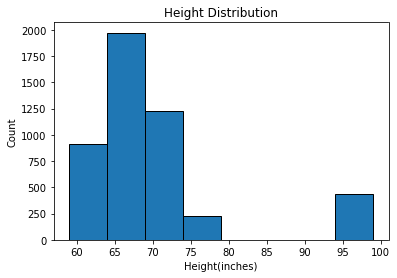

In [11]:
# Run this cell without changes
# A histogram should display below
plt.hist(height, bins=8, edgecolor='black')
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.title('Height Distribution');

Do you spot anything unusual above? Some outliers, maybe?

## Measures of Central Tendency

### Calculating the Mean

We're just beginning to dig into the data stored in `height`. We'll begin by writing a function to calculate the mean of the data.  Recall the formula for calculating mean:

$$ \Large \bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $$

Using the Python skills you have learned so far, create a function `get_mean()` to perform the following tasks: 
* Input a list of numbers (like the height list we have above)
* Calculate the sum of numbers and length of the list 
* Calculate mean from above, round off to 2 decimals and return it.

In [12]:
def get_mean(data):
    # Replace None with appropriate code
    mean = sum(data)/len(data)
    
    return round(mean,2)

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_mean(test1)) # 3.0
print(get_mean(test2)) # 2.5

3.0
2.5


Now, we'll test the function by passing in the height list.

In [ ]:
# Run this cell without changes
mean = get_mean(height)

print("Sample Mean:", mean) # Sample Mean: 69.58

So, we have our mean length, 69.58, and this confirms our observations from the histogram. But we also have some outliers in our data above and we know outliers affect the mean calculation by pulling the mean value in their direction. So, let's remove these outliers and create a new list to see if our mean shifts or stays. We'll use a threshold of 80 inches, i.e. filter out any values greater than 80. 
 
Perform following tasks:

* Create a function `filter_height_outliers` that takes a list as an argument
* Perform a `for` loop to iteratively check and append values to a new list if the value is less than 80, for every element in the original list
* Return the new list 

In [ ]:
def filter_height_outliers(data):
    
    filtered_data = []
    
    # Perform filtering here
    
    return filtered_data

test = [60, 70, 80, 90]
filter_height_outliers(test) # [60, 70]

Great, now we can use `filter_height_outliers()` to filter our `height` list and plot a new histogram to see if things change considerably.  

In [ ]:
# Filter the height list using the above function
# Replace None with appropriate code
filtered_height = None

len(filtered_height) # 4347

Now that we have filtered the outliers out of our data and reduced the size of the dataset from 4785 to 4347, let's recreate our histogram with 8 bins using our filtered data. 

**_NOTE_**: You do not need to reimport `matplotlib.pyplot as plt` -- once it's been imported, it's stored in memory and can be accessed whenever we like in other cells. 

In [ ]:
# Replace None with appropriate code
# A histogram should display below
plt.hist(None, bins=None);

Since we've filtered our data to remove outliers, we should also recalculate the mean.  Do this now in the cell below, using our `get_mean()` function. 

In [ ]:
# Replace None with appropriate code
new_mean = None

new_mean # 66.85

Does the mean height of our filtered data match up with what we see in our histogram of our filtered data?

Note that in some analytical situations we may not be able to exclude the outliers in such a naive manner. So, let's go ahead and calculate other measures of central tendency as well. We'll start by calculating the median value for our original (unfiltered) height data. 

### Calculating the Median 

The median is the value directly in the middle of the dataset. In statistical terms, this is the **_Median Quartile_**. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.

If the dataset has an odd number of values, then the median is the middle number.
If the dataset has an even number of values, then we take the mean of the middle two numbers.

In the cell below, write a function that takes in a list of numbers and returns the median value for that dataset. Make sure you first check for even / odd number of data points and perform the computation accordingly. The best approach to calculate the median is as follows:

1. Sort the data 
2. Check if the data has even or odd number of data points 
3. Calculate the median of the sorted data now that you know if the count is even or odd. 

Hints:

 - You can use the modulo operator `%` in Python to check if a value is even or odd -- odd numbers `% 2` (e.g. `5 % 2`) will equal `1`, while even numbers `% 2` (e.g. `4 % 2`) will equal `0`!
 - You can use integer division `//` to calculate the index -- for even numbers this just means that the result is an integer (e.g. `4 // 2` is `2` rather than `2.0`), while for odd numbers this means that the remainder is cut off (e.g. `7 // 2` is `3`, not `3.5`)

In [ ]:
def get_median(data):
    # Replace None with appropriate code
    data_sorted = None
    
    # Your code here
    # Check for even/odd and perform calculations accordingly - use if-else 

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_median(test1)) # 3
print(get_median(test2)) # 2.5

Great, now we can pass in our original `height` list to this function to check the median. 

In [ ]:
# Replace None with appropriate code
median = None

median # 67

So, we have 67, which is much closer to the filtered list mean (66.85) than the mean we calculated with actual list (69.58). So, median in this case seems to be a much better indicator of the central tendency found in the dataset. This makes sense because we've already learned that medians are less sensitive to outliers than mean values are! 

Next, we'll calculate the mode. This could give us better insight into the typical values in the dataset based on how frequent a value is.  

### Calculating the Mode

The mode is the value that shows up the most in a dataset. A dataset can have 0 or more modes. If no value shows up more than once, the dataset is considered to have no mode value. If two numbers show up the same number of times, that dataset is considered bimodal. Datasets where multiple values all show up the same number of times are considered multimodal.

In the cell below, write a function that takes in a list of numbers and returns another list containing the mode value(s). In the case of only one mode, the list would have a single element. 

**_Hint_**: Building a **_frequency distribution_** table using dictionaries is probably the easiest way to approach this problem. Use each unique element from the height list as a key, and the frequency of this element as the value and build a dictionary. You can then simply identify the keys (heights) with maximum values. 

In [ ]:
# Throughout this cell, replace None with appropriate code

def get_mode(data):

    # Create and populate frequency distribution
    frequency_dict = {}
    
    for height in data:
        # If an element is not in the dict, add it to the dict with value 1
        # If an element is already in the dict, +1 the value in place
        None
    
    # Find the frequency of the mode(s) by finding the largest
    # value in frequency_dict
    highest_freq = None
    
    # Create a list for mode values
    modes = []
    
    # From the dictionary, add element(s) to the modes list with max frequency
    for height, frequency in frequency_dict.items():
        None

    # Return the mode list 
    return modes

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]

print(get_mode(test1)) # [5]
print(get_mode(test2)) # [1, 5]

That's done. Now you can use the above function to calculate the mode of the original `height` list to compare it with our mean and median values. 

In [ ]:
# Replace None with appropriate code
mode = None

mode # [64]

So, the mode value is much lower than our mean and median calculated earlier. What do you make of this? The answer to that could be subjective and depends on the problem. i.e. if your problem is to identify sizes for garments that would sell the most, you cannot disregard mode. However, if you want to get an idea about the general or typical height of individuals, you can probably still do that with the median and the average. 

To get an even clearer picture, we know we need to see how much the values deviate from the central values we have identified. We have seen variance and standard deviation before as measures of such dispersion. Let's have a go at these to strengthen our understanding of this data. 

## Measures of Dispersion

### Calculating the Variance

The formula for variance is: 

$$ \Large s^2 = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$

Note that this formula is for the **sample** variance. The formula is slightly different than the formula for calculating population variance. Read more about the difference [here](https://www.macroption.com/population-sample-variance-standard-deviation/). In the cell below, write a function that takes a list of numbers as input and returns the variance (rounded to two decimal places) of the sample as output.

In [ ]:
# Replace None with appropriate code

def get_variance(sample):

    # First, calculate the sample mean using get_mean()
    sample_mean = None
    
    sum_of_squares = 0
    for height in sample:
        # Now, calculate the sum of squares by subtracting the sample mean
        # from each height, squaring the result, and adding it to the total
        None
        
    # Divide the sum of squares by the number of items in the sample -1 to calculate variance 
    variance = None
    
    return round(variance, 2)

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_variance(test1)) # 2.67
print(get_mean(test1)) # 3.33
print(get_variance(test2)) # 3.25

Now we can test the variance of our list `height` with our new `get_variance()` function. 

In [ ]:
# Replace None with appropriate code
variance = None

variance # 87.74

So this value, as we learned earlier, tells us a bit about the deviation but not in the units of underlying data. This is because it squares the values of deviations. Standard deviation, however, can deal with this issue as it takes the square roots of differences. So that would probably be a bit more revealing. 

## Calculating the Standard Deviation

In the cell below, write a function that takes a list of numbers as input and returns the standard deviation of that sample as output.

Recall that the formula for Standard Deviation is:

$$ \Large s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2} $$

To find the square root of a value in Python, you have two options (**either** approach will work):

One option is the `sqrt()` function from `math` library:

```python
from math import sqrt
sqrt(100) # 10.0
```

Alternatively, another approach would be to raise that number to the power of `0.5`:

```python
100**0.5 # 10.0
```

In [ ]:
# Replace None with appropriate code
from math import sqrt

def get_stddev(sample):
    
    stddev = None
    
    return round(stddev, 2)

test = [120,112,131,211,312,90]

get_stddev(test) # 84.03

So now we can finally calculate the standard deviation for our `height` list and inspect the results. 

In [ ]:
# Replace None with appropriate code
standard_deviation = None

standard_deviation # 9.37

So 9.37 inches is the amount of deviation present in our dataset. As we are still including outlier values, this might be slightly affected but these results are now much more reliable. 

Finally, we will build a boxplot for height data and see if it agrees with our understanding for this data that we have developed up to this point. Use the `matplotlib`'s `boxplot()` function with height data and comment on the output.

In [ ]:
# Replace None with appropriate code
# A boxplot should display below
plt.boxplot(None);

## Simplifying the Process with NumPy

We hope writing these functions was a useful experience in terms of deepening your understanding of these statistical measures as well as sharpening your Python skills. However in reality there is almost never a need to write these kinds of functions "by hand", since libraries like NumPy and SciPy can typically handle them for us in a single line.

Below is a demonstration of the same calculations performed above, written using Python libraries side-by-side with the results of the functions you've just written:

In [ ]:
# Run this cell without changes

import numpy as np
from scipy import stats

print("Mean:")
print(mean, "(our version)")
print(round(np.mean(height), 2), "(NumPy version)")
print()
print("Median:")
print(median, "(our version)")
print(np.median(height), "(NumPy version)")
print()
print("Mode:")
print(mode, "(our version)")
print(stats.mode(height, keepdims=True).mode, "(SciPy version)")
print()
print("Variance:")
print(variance, "(our version)")
print(round(np.var(height, ddof=1), 2), "(NumPy version)")
print()
print("Standard Deviation:")
print(standard_deviation, "(our version)")
print(round(np.std(height, ddof=1), 2), "(NumPy version)")

## Summary 

In this lab, we performed a basic, yet detailed, statistical analysis around measuring the tendencies of center and spread for a given dataset. We looked at building a number of functions to calculate different measures and also used some statistical visualizations to strengthen our intuitions around the dataset. We shall see how we can simplify this process as we study `numpy` and `pandas` libraries to ease out the programming load while calculating basic statistics. 